In [10]:
import mat73
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd 
import json
from os import walk
import seaborn as sns
from pathlib import Path
from scipy.stats import norm
import os

In [2]:
def read_json(file_name):
    with open(file_name) as f:
      data = json.load(f)
    return data

In [3]:
f = './results'
_, _, filenames = next(walk('./results'))

In [30]:
df = read_json("./results/"+filenames[3])

In [31]:
df.keys()

dict_keys(['name', 'avg_acc', 'coefs'])

In [32]:
arr = np.array(df['coefs'])

In [59]:
"""
input: folder, coefs_np_arr
change to abs value 
store only 0 and 1 to adjust 
store avg of all people to avg 
plot 
store sorted and top 20 to json file 
"""
def write_to_json(file_name,avg_acc,coefs):
    data = {} 
    data['top_20'] = avg_acc
    data['sorted'] = coefs
    with open(file_name, 'w') as outfile:
        json.dump(data, outfile)
def store_graph_sorted_results(folder,arr,threhold=0.0001):
    Path(folder).mkdir(parents=True, exist_ok=True)
    folder += "/"
    arr = np.absolute(arr)
    adjust = arr >= threhold
    adjust = adjust.astype(int)
    adjust = np.sum(adjust,axis=0)
    x = [i for i in range(adjust.shape[1])]
    
    avg = np.average(arr,axis=0)
    plt.figure(figsize=(15, 10))
    plt.xticks(np.arange(min(x), max(x)+1, 100))
    plt.bar(x, adjust[0])
    plt.xlabel('2048 features')
    plt.ylabel('count of 0s or 1s of all people')
    plt.savefig(folder+"count.png")
    plt.close()
    
    plt.figure(figsize=(15, 10))
    plt.xticks(np.arange(min(x), max(x)+1, 100))
    plt.bar(x, avg[0])
    plt.xlabel('2048 features')
    plt.ylabel('coef of average of all people')
    plt.savefig(folder+"results.png")
    plt.close()
    
    ax = sns.distplot(avg[0], fit=norm, kde=False)
    ax.set(xlabel='coef value', ylabel='count')
    ax.figure.savefig(folder+"histgram.png")
    plt.close()
    temp = [] 
    for i in range(len(x)):
        temp.append([x[i],avg[0][i]])
    temp.sort(key=lambda x:x[1],reverse=True)
    write_to_json(folder+"sorted_results.json",temp[:20],temp)

In [60]:
f = './results/graph/'
_, _, filenames = next(walk('./results'))
filenames.sort() 
filenames.remove('.DS_Store')
j = 0
for i in filenames:
    file = f+i[:-5]
    coefs = read_json("./results/"+i)['coefs']
    store_graph_sorted_results(file,coefs)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

In [23]:
# x = [i for i in range(arr.shape[1])]
# plt.bar(x,arr[0])

In [33]:
adjust = arr >= 0.0001
adjust = adjust.astype(int)
print(np.unique(adjust))
print(adjust.shape)
adjust = np.sum(adjust,axis=0)
print(adjust.shape)
x = [i for i in range(adjust.shape[1])]



# for i in range(arr.shape[0]):
#     temp = np.count_nonzero(arr[i] < 0.00001)
#     print(temp)


[0 1]
(33, 1, 2048)
(1, 2048)


In [34]:

# print(adjust.tolist())
# plt.bar(x,adjust[0])

In [35]:
avg = np.average(arr,axis=0)
avg.shape

(1, 2048)

In [74]:
plt.bar(x, adjust[0])
plt.xlabel('2048 features')
plt.ylabel('count of 0s or 1s of all people')
plt.savefig("out.png")
plt.close()

plt.bar(x, avg[0])
plt.xlabel('coefs')
plt.ylabel('count)
plt.savefig("out1.png")
plt.close()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


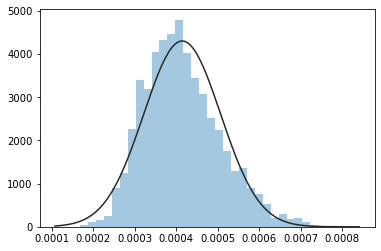

In [55]:
# plt.hist(adjust[0])
# plt.show()
# plt.hist(avg[0])
# plt.show()
# sns.displot(adjust[0])
# sns.displot(avg[0])
from scipy.stats import norm
sns.distplot(avg[0], fit=norm, kde=False)

In [79]:
temp = [] 
for i in range(len(x)):
    temp.append([x[i],avg[0][i]])
temp.sort(key=lambda x:x[1],reverse=True)
temp[:20]

[[804, 0.05230801212036928],
 [806, 0.04605059854948604],
 [662, 0.04322432418538339],
 [807, 0.040164131369087946],
 [660, 0.039941619581343846],
 [658, 0.03963139554326239],
 [664, 0.03931243475420074],
 [805, 0.03897537758500393],
 [808, 0.038173616013959986],
 [408, 0.038145492282789205],
 [1908, 0.036638182785688804],
 [665, 0.03542696591015031],
 [803, 0.03513725681835987],
 [659, 0.034309891789396856],
 [802, 0.03421213441927609],
 [932, 0.033325867369515205],
 [663, 0.03281488623392152],
 [1909, 0.030802915120865394],
 [1108, 0.030007527912089653],
 [661, 0.028365983402905547]]

In [255]:
f = './results/'
_, _, filenames = next(walk('./results'))
filenames.sort() 
# print(filenames)
fi = []
for i in filenames:
    if "100" in i:
        fi.append(i)
fi

['leave_one_order_33_stress_h100.json',
 'leave_one_order_33_stress_h1000.json',
 'leave_one_order_33_stress_l100.json',
 'leave_one_order_33_stress_l1000.json',
 'leave_one_order_33_stress_m100.json',
 'leave_one_order_33_stress_m1000.json',
 'leave_one_order_36_h100.json',
 'leave_one_order_36_h1000.json',
 'leave_one_order_36_l100.json',
 'leave_one_order_36_l1000.json',
 'leave_one_order_36_m100.json',
 'leave_one_order_36_m1000.json',
 'leave_one_order_42_h100.json',
 'leave_one_order_42_h1000.json',
 'leave_one_order_42_l100.json',
 'leave_one_order_42_l1000.json',
 'leave_one_order_42_m100.json',
 'leave_one_order_42_m1000.json',
 'leaveone_33_logistic100.json',
 'leaveone_33_logistic1000.json',
 'leaveone_39_logistic100.json',
 'leaveone_39_logistic1000.json',
 'leaveone_with_bad_logistic100.json',
 'leaveone_with_bad_logistic1000.json',
 'within_33logistic100.json',
 'within_33logistic1000.json',
 'within_39_logistic100.json',
 'within_39_logistic1000.json',
 'within_42_logist

In [144]:
leave39 = read_json(f+'leaveone_39_logistic100.json')['avg_acc']
for i in range(5):
    leave39.append(-1)
within = read_json(f+'within_42_logistic100.json')['avg_acc']
for i in range(2):
    within.append(-1)
leave42 = read_json(f+'leaveone_with_bad_logistic100.json')['avg_acc']
for i in range(2):
    leave42.append(-1)

TypeError: can only concatenate list (not "str") to list

In [264]:
n = "0.1"
leave33 = read_json(f+'leaveone_33_logistic'+n+'.json')['avg_acc']
csv_file = "1"+'.csv'
df = pd.read_csv(csv_file)
for _ in range(11):
    leave33.append(None)
df['between_classification.1'] = leave33[:42]
df.to_csv(csv_file)

In [261]:
n = "50"
l0 = read_json(f+'leave_one_order_33_stress_l'+n+'.json')['avg_acc']
for i in range(2):
    l0.append(-1)
m0 = read_json(f+'leave_one_order_33_stress_m'+n+'.json')['avg_acc']
for i in range(4):
    m0.append(-1)
h0 = read_json(f+'leave_one_order_33_stress_h'+n+'.json')['avg_acc']
for i in range(3):
    h0.append(-1)
# l = [1, 6, 9, 10, 12, 16, 19, 23, 26, 29, 31, 32, 33, 39]
# m = [3, 5, 7, 11, 15, 18, 20, 21, 22, 24, 28, 30, 34, 37] 
# h = [0, 2, 4, 8, 13, 14, 17, 25, 27, 35, 36, 38]
l = [1, 6, 9, 16, 19, 23, 26, 29, 31, 32, 33, 39, 10, 12]
m = [3, 5, 7, 15, 20, 21, 22, 24, 28, 30, 34, 37, 11, 18] 
h = [0, 2, 4, 8, 14, 17, 25, 27, 35, 38, 36, 13]
def combines(arr,vals):
    print(len(arr),len(vals))
    for i in range(len(arr)):
        arr[i] = [arr[i],vals[i]]
    return arr 
temp = []
temp = combines(l,l0) + combines(m,m0) + combines(h,h0)
temp.sort(key=lambda x:x[0])
final = []
print(temp)
for i in temp:
    final.append(i[1])
print(final)
csv_file = n+'.csv'
df = pd.read_csv(csv_file)

14 14
14 14
12 12
[[0, 0.8888888888888888], [1, 0.6944444444444444], [2, 0.6666666666666666], [3, 0.4722222222222222], [4, 0.7777777777777778], [5, 0.75], [6, 0.6944444444444444], [7, 0.5833333333333334], [8, 0.7777777777777778], [9, 0.6388888888888888], [10, -1], [11, -1], [12, -1], [13, -1], [14, 0.6666666666666666], [15, 0.6388888888888888], [16, 0.5555555555555556], [17, 0.5277777777777778], [18, -1], [19, 0.7777777777777778], [20, 0.6111111111111112], [21, 0.7777777777777778], [22, 0.5833333333333334], [23, 0.6944444444444444], [24, 0.6666666666666666], [25, 0.6944444444444444], [26, 0.7777777777777778], [27, 0.7777777777777778], [28, 0.6666666666666666], [29, 0.6666666666666666], [30, 0.6111111111111112], [31, 0.8055555555555556], [32, 0.6666666666666666], [33, 0.6944444444444444], [34, -1], [35, 0.6666666666666666], [36, -1], [37, -1], [38, -1], [39, 0.7777777777777778]]
[0.8888888888888888, 0.6944444444444444, 0.6666666666666666, 0.4722222222222222, 0.7777777777777778, 0.75, 0.

In [251]:
for i in range(4):
    final.append(-1)

In [252]:
# csv_file = '1000.csv'
# df = pd.read_csv(csv_file)
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1',
       'Exp_ID', 'exp_time', 'trais no.', 'note', 'signal_condition', 'gender',
       'age', 'race', 'handiness', 'sleep condition', 'Q11', 'Q12', 'Q13',
       'Q14', 'ID', 'ID_boy', 'ID_girl', 'within_classification', 'stress',
       'stressGroup', '42set_ID', 'between_classification_all',
       'between_stressGroup', '39set_ID', 'between_classification',
       'between_stressGroup.1', '33set_ID', 'between_classification.1',
       'between_stressGroup.2'],
      dtype='object')

In [253]:
df['between_stressGroup.2'] = final[:44]

In [139]:
df['within_classification'] = within
df['between_classification_all']=leave42
df['between_classification']=leave39

In [254]:
df.to_csv(csv_file)

In [12]:
import multiprocessing

_MAX_ITERATIONS = 10

def worker(numbers):
    print(numbers)


nums = ["1","2","3"]
for i in nums:
    p = multiprocessing.Process(target=worker, args=(i,))
    p.start()

In [4]:
filenames

['leave_one_order_33_stress_l100.json',
 'leave_one_order_33_stress_h0.1.json',
 'leave_one_order_42_h1.json',
 'within_33logistic1000.json',
 'within_42_logistic100.json',
 'leave_one_order_42_m50.json',
 'leaveone_33_logistic50.json',
 'within_33logistic100.json',
 'leave_one_order_36_h1000.json',
 'leave_one_order_33_stress_m1000.json',
 'leave_one_order_33_stress_l1000.json',
 'leaveone_33_logistic0.1.json',
 '.DS_Store',
 'within_42_logistic50.json',
 'leave_one_order_36_l50.json',
 'leave_one_order_33_stress_m100.json',
 'leave_one_order_33_stress_m50.json',
 'leave_one_order_42_l1.json',
 'leave_one_order_36_h50.json',
 'leaveone_33_logistic1000.json',
 'within_39_logistic50.json',
 'within_39_logistic100.json',
 'leave_one_order_42_l100.json',
 'leave_one_order_42_h0.1.json',
 'leave_one_order_36_l0.1.json',
 'leave_one_order_36_h100.json',
 'leave_one_order_36_m0.1.json',
 'leave_one_order_42_m1.json',
 'leave_one_order_42_m100.json',
 'leave_one_order_42_h1000.json',
 'leaveo

### Get feature importance 
- select faetures with highest frequences 

In [15]:
f = './results/feature_importance/'
folders = [x[0] for x in os.walk(f)][1:]

In [21]:
folders
file = '/sorted_results.json'
d = {} 
# go through each folder 
# increment by 1 or init 
for i in folders:
    temp = read_json(i+file)
    for index,val in temp['top_20']:
        d[index] = d.get(index,0)+1

In [27]:
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1),reverse=True)

In [37]:
store = {"results":sorted_d}
with open("feature_importance_restuls.josn", 'w') as outfile:
    json.dump(store, outfile)

In [34]:
temp = read_json(folders[0]+file)
temp.keys()

dict_keys(['top_20', 'sorted'])

In [35]:
len(folders)

63

In [36]:
folders

['./results/feature_importance/leave_one_order_36_l1000',
 './results/feature_importance/leave_one_order_36_m1000',
 './results/feature_importance/leaveone_39_logistic0.1',
 './results/feature_importance/within_39_logistic0.1',
 './results/feature_importance/leaveone_33_logistic100',
 './results/feature_importance/leave_one_order_42_m100',
 './results/feature_importance/within_39_logistic50',
 './results/feature_importance/within_42_logistic50',
 './results/feature_importance/leaveone_33_logistic50',
 './results/feature_importance/leave_one_order_36_l50',
 './results/feature_importance/leave_one_order_42_l100',
 './results/feature_importance/leaveone_39_logistic1000',
 './results/feature_importance/leave_one_order_42_h100',
 './results/feature_importance/leave_one_order_36_h50',
 './results/feature_importance/leave_one_order_36_h1000',
 './results/feature_importance/leaveone_33_logistic1000',
 './results/feature_importance/leaveone_with_bad_logistic100',
 './results/feature_importance/

In [38]:
128*8*2

2048